In [1]:
import time
import os
import traceback
import numpy as np
import json
import shutil
from os.path import isfile, join
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
os.chdir("../../")

In [5]:
def plot_scatter(data):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    sns.scatterplot(data=data, x="img_size", y="rest_time", label="REST")
    sns.scatterplot(data=data, x="img_size", y="grpc_time", label="GRPC")
    plt.legend(loc="upper left")
    plt.xlabel("Data Size (MB)")
    plt.ylabel("Time (ms)")

In [6]:
def plot_line(data):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    sns.lineplot(data=data, x="img_size", y="rest_time", label="REST")
    sns.lineplot(data=data, x="img_size", y="grpc_time", label="GRPC")
    plt.legend(loc="upper left")
    plt.xlabel("Data Size (MB)")
    plt.ylabel("Time (ms)")

# `Animals-10 Data`

### Data Preprocessing

In [8]:
os.getcwd()

'/Users/ashmi/Scripts/open-source/img-classifier-tfx'

In [9]:
image_path = os.getcwd() + "/data/animals-10/"
folder_names = os.listdir(image_path+"raw-img")
folder_names

['cat',
 'butterfly',
 'dog',
 'sheep',
 'spider',
 'chicken',
 'horse',
 'squirrel',
 'cow',
 'elephant']

In [10]:
image_data_path = image_path + "data"

In [11]:
df = pd.read_csv("/Users/ashmi/Scripts/open-source/img-classifier-tfx/results/results.csv")
df.head()

,rest_predicted_label,rest_probability,image_name,rest_time,img_size,grpc_predicted_label,grpc_probability,grpc_time
0,tiger cat,0.935054,1716.jpeg,0.360865,8288,tiger cat,0.935054,0.220654
1,tiger beetle,0.783175,OIP-O8pS0Olk1otgzutk3t9AMAHaF0.jpeg,0.392728,23439,tiger beetle,0.783175,0.207237
2,Welsh springer spaniel,0.599216,OIP-7Kyjub53-QqanyWanuJpOwHaHx.jpeg,0.402435,11115,Welsh springer spaniel,0.599216,0.208201
3,Border collie,0.119200,OIP-gDltiSP_dGW6G3UK6dQRfwHaEI.jpeg,0.399908,8161,Border collie,0.119200,0.500309
4,stingray,0.621455,OIP-50vmhkNIM1LKU3JoYIRmegHaFj.jpeg,0.657537,12708,stingray,0.621455,0.399228


In [16]:
df.sort_values(by="img_size", inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,rest_predicted_label,rest_probability,image_name,rest_time,img_size,grpc_predicted_label,grpc_probability,grpc_time
0,guinea pig,0.888573,OIP-jqjnI-BWj-9BkPeqZetiggAAAA.jpeg,0.429392,1455,guinea pig,0.888573,0.791369
1,shower cap,0.301053,OIP-g2ysV7ZtLXJSmzOYfJlKQwAAAA.jpeg,0.321724,1542,shower cap,0.301053,1.395406
2,standard poodle,0.149499,OIP-bT32YLeLizQNLnu4lcVGAAAAAA.jpeg,0.609305,1572,standard poodle,0.149499,0.203656
3,guinea pig,0.590027,OIP-K8QgBSuaAkfMGBB_1C84uQAAAA.jpeg,0.741064,1653,guinea pig,0.590027,0.207148
4,guinea pig,0.863138,OIP-zVErTw8mSPohwjPxvw6ehgAAAA.jpeg,0.638813,1708,guinea pig,0.863138,0.237427


In [20]:
df_plot=df[["image_name", "img_size", "rest_time", "grpc_time"]]
df_plot.head()

,image_name,img_size,rest_time,grpc_time
0,OIP-jqjnI-BWj-9BkPeqZetiggAAAA.jpeg,1455,0.429392,0.791369
1,OIP-g2ysV7ZtLXJSmzOYfJlKQwAAAA.jpeg,1542,0.321724,1.395406
2,OIP-bT32YLeLizQNLnu4lcVGAAAAAA.jpeg,1572,0.609305,0.203656
3,OIP-K8QgBSuaAkfMGBB_1C84uQAAAA.jpeg,1653,0.741064,0.207148
4,OIP-zVErTw8mSPohwjPxvw6ehgAAAA.jpeg,1708,0.638813,0.237427


In [21]:
df_plot["img_size"]=df_plot["img_size"]/1000000
df_plot.sort_values(by="img_size", ascending=False)

/var/folders/sf/by75wk7n6072p9sct5tdgmy80000gn/T/ipykernel_61714/4225952207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot["img_size"]=df_plot["img_size"]/1000000


,image_name,img_size,rest_time,grpc_time
25781,max-boettinger-486490-unsplash.jpg,5.574493,0.704966,0.231725
25780,lily-lvnatikk-348257-unsplash.jpg,4.470625,0.623422,0.207196
25779,q-aila-162475-unsplash.jpg,4.387534,0.345450,0.531934
25778,pacto-visual-199601-unsplash.jpg,4.275525,0.489107,0.215690
25777,mikhail-vasilyev-130018-unsplash.jpg,4.150286,0.847969,0.216240
...,...,...,...,...
4,OIP-zVErTw8mSPohwjPxvw6ehgAAAA.jpeg,0.001708,0.638813,0.237427
3,OIP-K8QgBSuaAkfMGBB_1C84uQAAAA.jpeg,0.001653,0.741064,0.207148
2,OIP-bT32YLeLizQNLnu4lcVGAAAAAA.jpeg,0.001572,0.609305,0.203656
1,OIP-g2ysV7ZtLXJSmzOYfJlKQwAAAA.jpeg,0.001542,0.321724,1.395406


Text(0, 0.5, 'Time (ms)')

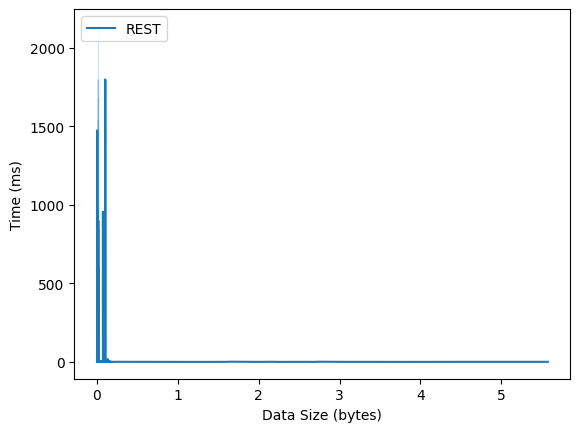

In [22]:
sns.lineplot(data=df_plot, x="img_size", y="rest_time", label="REST")
# sns.lineplot(data=data, x="img_size", y="grpc_time", label="GRPC")
plt.legend(loc="upper left")
plt.xlabel("Data Size (MB)")
plt.ylabel("Time (ms)")

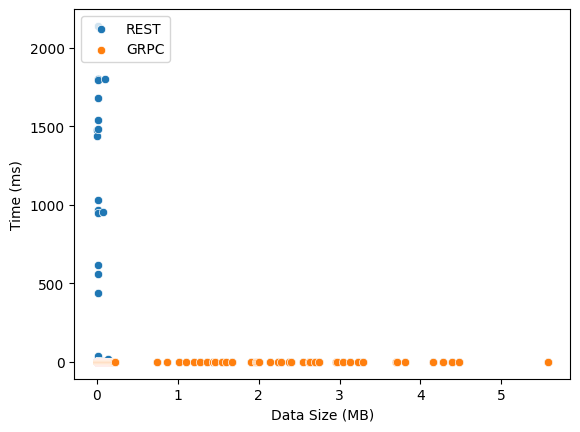

In [24]:
plot_scatter(df_plot)

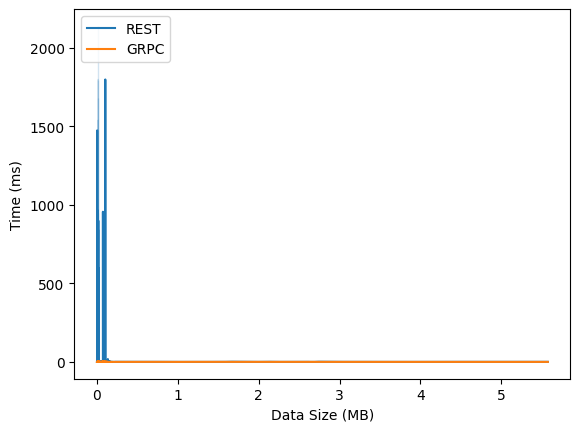

In [25]:
plot_line(df_plot)

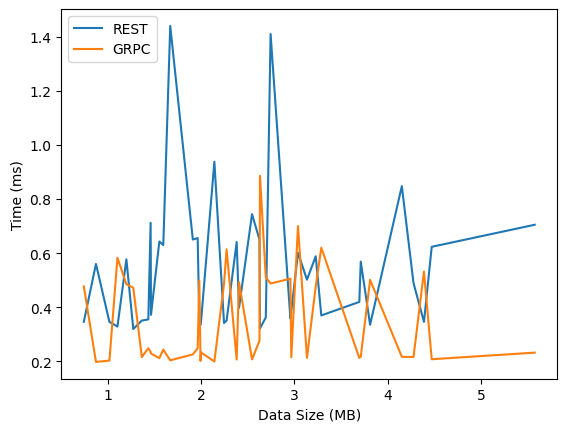

In [28]:
plot_line(df_plot.loc[df['img_size'] >400000])

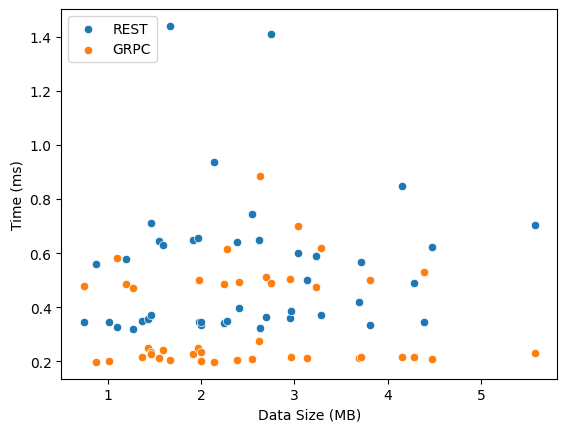

In [29]:
plot_scatter(df_plot.loc[df['img_size'] >400000])

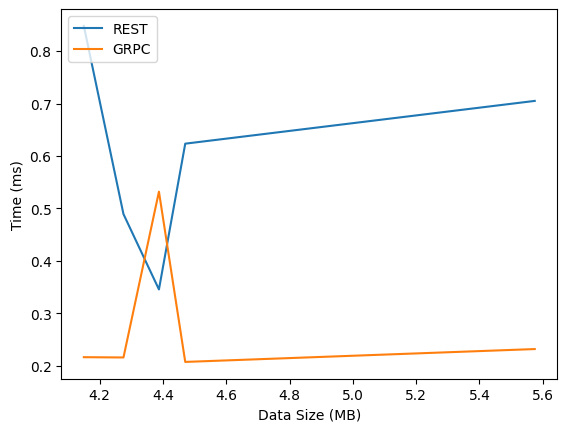

In [27]:
plot_line(df_plot.loc[df_plot['img_size'] >4])

In [ ]:
plot_scatter(df_plot.loc[df_plot['img_size'] >400000])

In [ ]:
df_plot.loc[df_plot['img_size'] >40000]

In [ ]:
plot_line(df_plot.loc[df_plot['img_size'] >400000])

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.loc[df["img_size"]>50000]

In [ ]:
df["rest_time"].max()

In [ ]:
df["rest_time"].min()

In [ ]:
df["grpc_time"].max()

In [ ]:
df.sort_values(by="rest_time", ascending=False).head(20)